In [1]:
pacman::p_load(CausalImpact)

In [2]:
set.seed(0)
duration = 150
intervention_period = 125:150
x1 = 100 + arima.sim(model = list(ar = 0.999), n = duration)
y = 1.2 * x1 + rnorm(duration)
y[intervention_period] = y[intervention_period] + 10
data = cbind(y, x1)

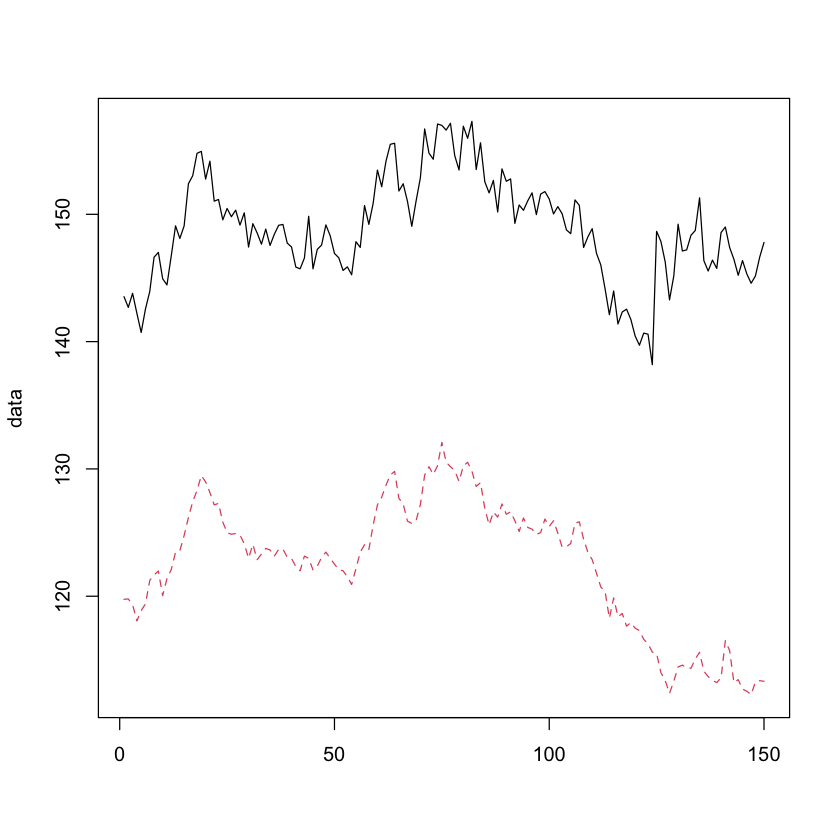

In [3]:
matplot(data, type = "l")

## Create a model to predict Y based on the data from before the intervention
## Use it to predict the outcome during the intervention

In [4]:
pre.period <- c(1, min(intervention_period) - 1)
post.period <- c(min(intervention_period), duration)
impact <- CausalImpact(data, pre.period, post.period)

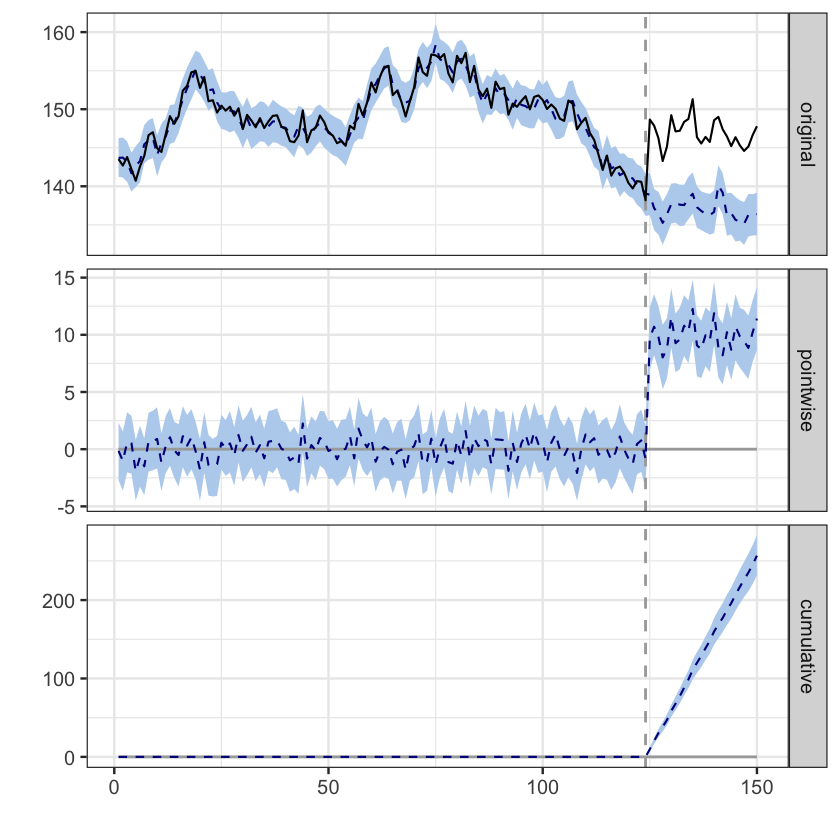

In [5]:
plot(impact)

## Repeat the analysis using a time period from before the actual intervention

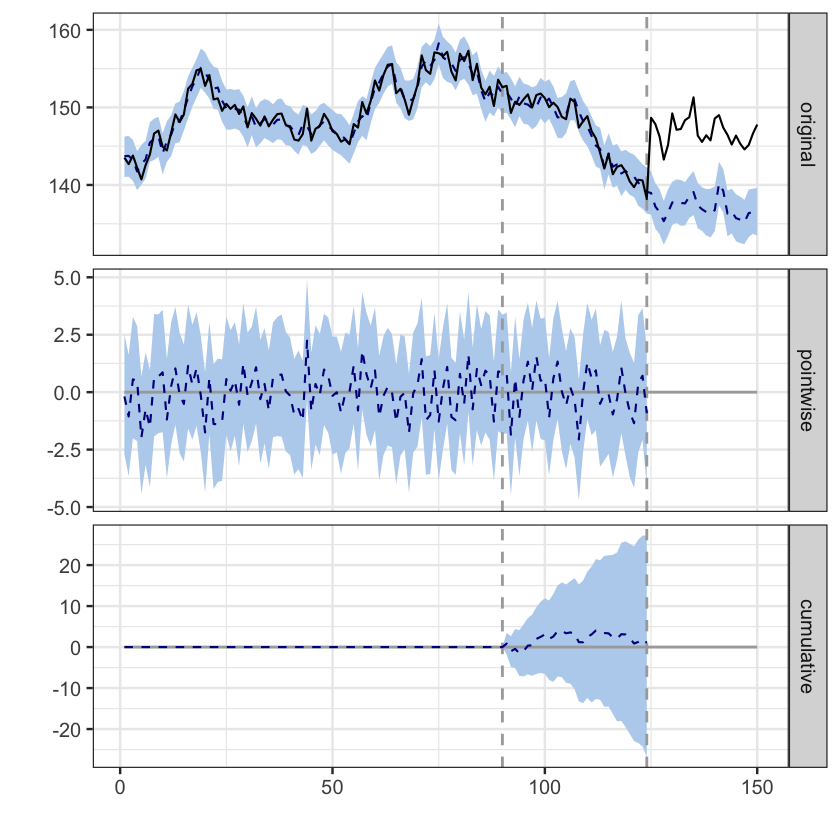

In [6]:
pre.period <- c(1, 90)
post.period <- c(91, min(intervention_period) - 1)
placebo <- CausalImpact(data, pre.period, post.period)
plot(placebo)